# BrainStation 
## Instructor Challenge, Data Science

### 0. Before We Begin

Before we get stated with our activity, we need to make sure we all have the correct tools avaliable in our Jupyter Notebooks. In this notebook, we're going to use the following Python packages:

* Pandas (our data manipulation toolkit)
* Numpy (our mathematics toolkit)
* Matplotlib (our default graphing toolkit)
* Plotly (our interactive graphing toolkit)
* Ploty Express (a wrapper for Plotly to make our graphing lives much easier)
* Scikit-Learn (our modelling toolkit)
* Scikit-image (one of our toolkits for interacting with images)
* OpenCV (another of our toolkit for interacting with images)

If you don't have these five packages installed, open your Terminal, Command Line, etc. and run the following code. You can either use `pip` (Packake Installer for Python) or `conda` (if you're using Anaconda to manage your Python environment). 

 `pip`:
 ```
 pip install pandas
 pip install numpy
 pip install matplotlib
 pip install plotly
 pip install plotly_express
 pip install scikit-learn
 pip install scikit-image
 pip install opencv-python
 ```
 
 `conda`:
 ```
 conda install pandas
 conda install numpy
 conda install matplotlib
 conda install plotly
 conda install plotly_express
 conda install scikit-learn
 conda install scikit-image
 conda install opencv-python
 ```

Now that we have those packages installed, let's import them into our Jupyter Notebook so that we can use them or our activity:

In [35]:
# Our data manipulation packages
import pandas as pd
import numpy as np

# Out graphing packages
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px

# Our modelling packages
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Out image packages, we only need these specific pieces; `cv2` is from OpenCV
import cv2
from skimage.color import rgb2lab, deltaE_cie76

# Included in Python, we will need these for later
from collections import Counter
import os

print("Packages have been imported")

Packages have been imported


If everything worked, then you should have a message above that says "Packages have been imported". 
Now we're ready to start!

---

### 1. Classification

In this activity, we will be going more in-depth into classification using K-Means. We'll be expanding on our example we saw in the lecture: classifying images into their primary color(s).

Much of the code in this activity is from a tutorial written on Medium's Towards Data Science: (https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)[https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71]. I don't expect  everyone to know how to write this code from scratch, we'll be focusing more on the concepts of our classifcation model instead.

Here, OpenCV will read our image into our notebook. It might look a bit funny, OpenCV reads images in Blue-Green-Red (BGR) instead of Red-Green-Blue (RGB).

The type of this input is <class 'numpy.ndarray'>
Shape: (408, 612, 3)


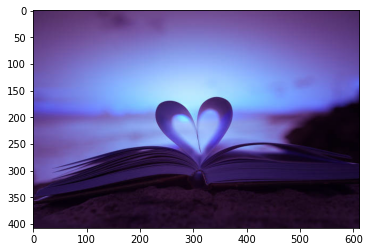

In [36]:
image = cv2.imread('../data/image1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

Let's turn our image back to RGB.

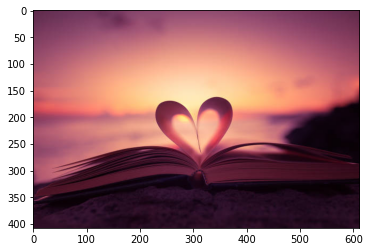

In [37]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

We'll also create some functions to help up later on.

In [38]:
def RGB2HEX(color):
    # Converts our RGB color into a HEX color. Useful for our labels later on.
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [100]:
RGB2HEX([100,250,100])

'#64fa64'

In [ ]:
def modify_image(image):
    # Convert our image into a 600x400 pixel image and converts it into something our model will be able to read. 
    # Our K-Means model and plotting packages are specific about how data needs to be entered.
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    return modified_image

In [114]:
modified_image = modify_image(image)
modified_image

array([[91, 40, 73],
       [92, 41, 74],
       [92, 41, 74],
       ...,
       [44, 12, 33],
       [44, 12, 33],
       [44, 12, 33]], dtype=uint8)

In [39]:
def get_image(image_path):
    # Bundle up reading an image into Jupyter Notebook and converting BGR to RGB.
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

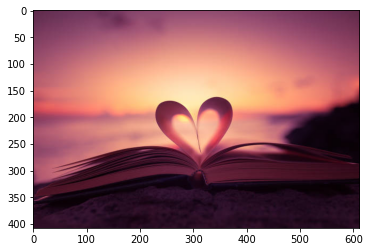

In [104]:
image = get_image('../data/image1.jpg')
plt.imshow(image)

#### A. 

Use one of the above functions and read in each of the images we're going to be working on. There should be five images in total.

In [ ]:
## Enter your code here.

#### B. 

The function below uses our `plotly` library to create an interactive chart. What we are doing is plotting each pixel of our image and showing where our colors are located in our RGB spectrum. Since our image is 600x400 (or 240,000 pixels, we're only showing a small fraction of them).

Describe what you see in the chart below.

In [115]:
def plot_rgb(image):
    modified_image = modify_image(image)
    df_image = pd.DataFrame(modified_image, columns=["Red", "Green", "Blue"])
    fig = px.scatter_3d(
        df_image.sample(frac=0.0001, replace=True, random_state=142857),
        x="Red",
        y="Green",
        z="Blue",
        title="RGB Values of an Image",
        template="plotly_white",
    )
    fig.show()

In [116]:
image = get_image('../data/image1.jpg')
plot_rgb(image)

##### I. 

Why is our plot in three dimensions? What does each axis represent?

> Enter your answers here.

##### II. 

What does the point (0,0,0) represent? What does (255,255,255) represent? What does (128,64,64) represent? 

> Enter your answers here.

##### III. 

In the above chart, are there any groups of points you can separate out by looking at it (hint: make sure you rotate the chart with your mouse; hold left-click to move and use scroll to zoom)? How many groups do you see? What do these groups represent?

> Enter your answers here.

##### IV: 

Repeat question III for another of our images. Are there any differences from your answer above?

> Enter your answers here.

#### B. Modelling using K-Means

The below functions is how we are going to classify our images and show our results

In [141]:
def classify_image_colors(image, number_of_colors):
    modified_image = modify_image(image)

    kmeans = KMeans(n_clusters = number_of_colors)
    labels = kmeans.fit_predict(modified_image)

    center_colors = kmeans.cluster_centers_
    
    return [center_colors, labels]

In [ ]:
def plot_colors(center_colors, labels):

    counts = Counter(labels)
    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    df_piechart = pd.DataFrame(
        data = [counts.values(), hex_colors, rgb_colors],
    ).T
    df_piechart.columns = ["Counts", "HEX Colors", "RGB Colors"]

    plt.figure(figsize = (8, 6))
    plt.pie(df_piechart["Counts"], labels = df_piechart["HEX Colors"], colors = df_piechart["HEX Colors"])

    return df_piechart

Let's use our model and see what comes out.

In [151]:
image = get_image('../data/image1.jpg')
kmeans_model = classify_image_colors(image, 5)

center_colors = kmeans_model[0]
labels = kmeans_model[1]

print("Center Colors:")
print("Values:", center_colors)
print("Number of Values:", len(center_colors))

print("\n")

print("Labels:")
print("Values:", labels)
print("Number of Values:", len(labels))

Center Colors:
Values: [[ 34.37894145  10.04453252  27.35073038]
 [214.5777267  122.3427338  121.63540031]
 [249.8875319  183.65293474 143.95862195]
 [157.62088947  78.54162742 107.73766329]
 [ 97.03940566  36.01371871  62.42336658]]
Number of Values: 5


Labels:
Values: [4 4 4 ... 0 0 0]
Number of Values: 240000


,Counts,HEX Colors,RGB Colors
0,24618,#220a1b,"[34.37894144909002, 10.04453251568765, 27.3507..."
1,48784,#f9b78f,"[249.88753189944717, 183.6529347429062, 143.95..."
2,53444,#9d4e6b,"[157.62088947132014, 78.54162742126856, 107.73..."
3,38413,#d67a79,"[214.57772669513201, 122.34273379682352, 121.6..."
4,74741,#61243e,"[97.03940565846854, 36.01371870549072, 62.4233..."


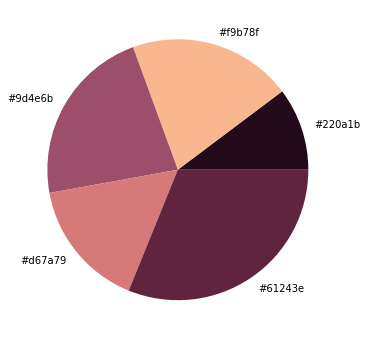

In [152]:
plot_colors(center_colors, labels)

##### I. 

What do the "Center Colors" of our our model represent?

> Enter your answers here.

##### II. 

What do the "Labels" of our our model represent?

> Enter your answers here.

##### III: 

Try a different image in our model. What changes?

> Enter your answers here.

##### IV: 

In part A, we saw that there were a number of groups we could pick out using just our eyes. Change the model to use this number of colors instead. What changes?

> Enter your answers here.

##### V: 

Try modelling with 10 colors. How different are the colors? Now try with only 2 colors. 

As we increase the number of colors we are classifying, how useful is each color? 

> Enter your answers here.

---

### 2. Prediction

In this activity, we will be going more in-depth into prediction using Linear Regression. We'll be expanding on our example we saw in the lecture: predicting house prices using different pieces of data.

Much of the code in this activity is from a tutorial written on Medium's Towards Data Science: (https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f)[https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f].

In this activity, we will also be getting some practice with data manipulation using `pandas`. 

#### A: 

Read in our dataset located in our data folder, print the columns that we have in our dataset, and show the top 5 rows.

In [153]:
# Enter your code here.

#### B: 

In the lecture, we were looking at predicting house prices using house size. Manipulate your dataframe so that we only have "price" and "sqft_living".

Show summary statistics for "price" and for "sqft_living": number of observations, mean, standard deviation, minimum, and maximum.

In [154]:
# Enter your code here.

#### C:

Plot "price" and "sqft_living" on a chart where you can see the relationship between the two. You can use `matplotlib` or `plotly.express`, whichever you are more comfortable with. 

What is the relationship between "price" and "sqft_living"?

In [155]:
# Enter your code here.

> Enter your answers here.

#### D:

The below functions is going to be how we predict house prices using our model. 

In [160]:
def linear_regression_model(intercept):
    if intercept == True:
        reg = LinearRegression(fit_intercept=True)
        reg.fit(
            np.array(df_house_prices["sqft_living"]).reshape(-1,1), 
            np.array(df_house_prices["price"]).reshape(-1,1), 
        )
        price_per_sqft = reg.coef_[0][0]
        intercept = reg.intercept_[0]
        
    else:
        reg = LinearRegression(fit_intercept=False)
        reg.fit(
            np.array(df_house_prices["sqft_living"]).reshape(-1,1), 
            np.array(df_house_prices["price"]).reshape(-1,1), 
        )
        price_per_sqft = reg.coef_[0][0]
        intercept = reg.intercept_
        
    return [price_per_sqft, intercept, reg]

In [161]:
def linear_regression_prediction(regression_model, sqft):
    prediction = clf.predict(np.array([[sqft]]))[0][0]
    return prediction

In [169]:
linreg_model = linear_regression_model(intercept=True)
coefficient = linreg_model[0]
intercept = linreg_model[1]

print("Price =", round(coefficient, 2), "* house_size +", round(intercept,2))

Price = 280.62 * house_size + -43580.74


In [170]:
linear_regression_prediction(linreg_model[2], 3000)

798289.9605978708

In [175]:
def plot_linear_regression_model(coefficient, intercept):
    x_values = []
    y_values = []
    for x in range(0,4000):
        x_values.append(x)
        y_values.append(coefficient * x + intercept)

    df_model = pd.DataFrame(columns=["sqft_living","price"])
    df_model["sqft_living"] = x_values
    df_model["price"] = y_values

    fig = px.line(
        df_model,
        x="sqft_living",
        y="price",
        title="Relationship Between Price and Size of House",
        template="plotly_white",
    )
    fig.show()

In [176]:
plot_linear_regression_model(coefficient, intercept)

##### I: 

What does the above model tell us about how house price changes in relation to house size?

> Enter your answers here.

##### II: 

Our intercept is negative here. What does that mean? How does our model change if have no intercept? Should we change our model to have no intercept?

> Enter your answers here.

##### III: 

Use the `linear_regression_prediction` function to predict what a house price should most likely be at 1,000 sq. ft. Do the same for 10,000 sq. ft. 

Explain what the model is doing when we are predicting prices.

In [177]:
# Enter your code here.

> Enter your answers here.

---